In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import re

In [2]:
df = pd.read_csv(r"C:\Users\yzdn\Desktop\Data Science\Intern Projects\Retail Analysic\Raw Data\products.csv")

In [3]:
df.head()

,product_id,product_name,category,brand,cost_price,unit_price,margin_pct
0,P0000,BrandA Shoulder,Electronics,BrandC,52.75,64.65,18.41
1,P0001,BrandA Responsibility,Electronics,BrandD,11.20,13.26,15.54
2,P0002,BrandB Small,Electronics,BrandB,144.62,250.37,42.24
3,P0003,BrandD Continue,Apparel,BrandD,119.91,219.25,45.31
4,P0004,BrandA Indeed,Apparel,BrandD,71.35,88.47,19.35


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1224 entries, 0 to 1223
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   product_id    1224 non-null   object 
 1   product_name  1224 non-null   object 
 2   category      1224 non-null   object 
 3   brand         1164 non-null   object 
 4   cost_price    1224 non-null   float64
 5   unit_price    1224 non-null   float64
 6   margin_pct    1224 non-null   float64
dtypes: float64(3), object(4)
memory usage: 67.1+ KB


In [5]:
df.isnull().sum()

product_id       0
product_name     0
category         0
brand           60
cost_price       0
unit_price       0
margin_pct       0
dtype: int64

In [6]:
str_cols = ["product_id","product_name","category","brand"]
for col in str_cols:
    df[col] = df[col].astype(str).str.strip()

In [7]:
df.duplicated().sum()

np.int64(24)

In [8]:
df = df.drop_duplicates()

In [9]:
df["brand"] = df["brand"].fillna("unknown")

In [10]:
def clean_brand(brand):
    if not isinstance(brand, str):
        return brand

    brand = brand.strip().lower()
    
    # ✅ Keep "unknown" as is
    if brand == "nan":
        return "unknown"

    # 🛠️ Fix compressed brand like "brandc" → "Brand C"
    match = re.match(r'^(brand)([a-z])$', brand)
    if match:
        return f"{match.group(1).title()} {match.group(2).upper()}"

    # 🔡 Otherwise, just title-case it
    return brand.title()

# Apply to brand column
df["brand"] = df["brand"].apply(clean_brand)

In [11]:
def fix_product_name(text):
    if isinstance(text, str):
        text = text.strip().lower()
        match = re.match(r'^(brand)([a-z])\b(.*)', text)
        if match:
            brand = f"{match.group(1)} {match.group(2)}"
            rest = match.group(3).strip()
            full_name = f"{brand} {rest}".strip()
            return full_name.title()
        else:
            return text.title()
    return text

df["product_name"] = df["product_name"].apply(fix_product_name)

In [12]:
df["product_name"] = df["product_name"].str.strip().str.lower()
df["category"] = df["category"].str.strip().str.lower()
df["brand"] = df["brand"].str.strip().str.lower()

In [13]:
for col in df.columns:
    df[col] = df[col].astype(str)

    df[col] = df[col].str.strip().replace(r'\s+', ' ', regex=True)

    df[col] = pd.to_numeric(df[col], errors='ignore')

C:\Users\yzdn\AppData\Local\Temp\ipykernel_2032\945736489.py:6: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_numeric(df[col], errors='ignore')
C:\Users\yzdn\AppData\Local\Temp\ipykernel_2032\945736489.py:6: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_numeric(df[col], errors='ignore')
C:\Users\yzdn\AppData\Local\Temp\ipykernel_2032\945736489.py:6: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_numeric(df[col], errors='ignore')
C:\Users\yzdn\AppData\Local\Temp\ipykernel_2032\945736489.py:6: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without p

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1200 entries, 0 to 1199
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   product_id    1200 non-null   object 
 1   product_name  1200 non-null   object 
 2   category      1200 non-null   object 
 3   brand         1200 non-null   object 
 4   cost_price    1200 non-null   float64
 5   unit_price    1200 non-null   float64
 6   margin_pct    1200 non-null   float64
dtypes: float64(3), object(4)
memory usage: 75.0+ KB


In [15]:
df["brand"].value_counts()

brand
brand d    306
brand c    293
brand b    278
brand a    263
unknown     60
Name: count, dtype: int64

In [16]:
df["category"].unique()

array(['electronics', 'apparel', 'home & kitchen', 'personal care'],
      dtype=object)

In [17]:
df["category"].value_counts()

category
personal care     312
electronics       301
apparel           297
home & kitchen    290
Name: count, dtype: int64

In [18]:
df.describe()

,cost_price,unit_price,margin_pct
count,1200.000000,1200.000000,1200.000000
mean,103.068000,159.561975,33.826383
std,55.964199,90.698730,11.282351
min,5.290000,6.770000,9.120000
25%,54.697500,83.887500,25.282500
50%,104.165000,157.590000,36.225000
75%,151.342500,226.220000,43.152500
max,199.470000,382.320000,49.990000


In [19]:
#Z-score
outliers=[]
def detect_outliers(data):
    threshold=3
    mean=np.mean(data)
    std=np.std(data)
    
    for i in data:
        z_score=(i-mean)/std
        if np.abs(z_score)>threshold:
            outliers.append(i)
    return outliers

In [20]:
detect_outliers(df["cost_price"])

[]

<Axes: xlabel='cost_price', ylabel='Count'>

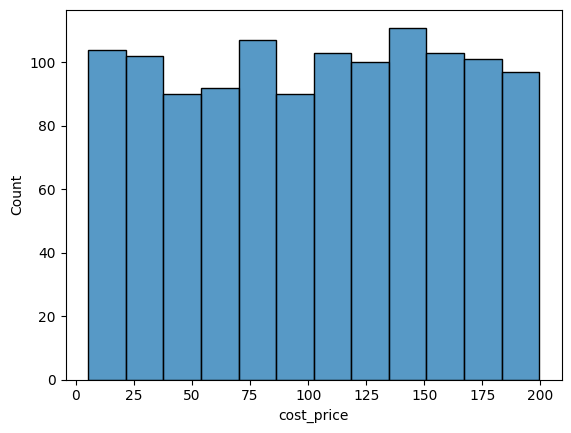

In [21]:
sns.histplot(df["cost_price"])

In [22]:
#profit per unit
df["profit_per_unit"] = df["unit_price"] - df["cost_price"]

In [23]:
def classify_price_range(price):
    if pd.isna(price):
        return "unknown"
    elif price <= 100:
        return "budget"
    elif 101 <= price <= 500:
        return "mid Range"
    else:
        return "premium"

df["price_range"] = df["unit_price"].apply(classify_price_range)

In [24]:
def margin_category(margin):
    if pd.isna(margin):
        return "unknown"
    elif margin <= 10:
        return "low margin"
    elif margin <= 25:
        return "medium margin"
    else:
        return "high margin"

df["margin_category"] = df["margin_pct"].apply(margin_category)


In [25]:
df.head()

,product_id,product_name,category,brand,cost_price,unit_price,margin_pct,profit_per_unit,price_range,margin_category
0,P0000,brand a shoulder,electronics,brand c,52.75,64.65,18.41,11.90,budget,medium margin
1,P0001,brand a responsibility,electronics,brand d,11.20,13.26,15.54,2.06,budget,medium margin
2,P0002,brand b small,electronics,brand b,144.62,250.37,42.24,105.75,mid Range,high margin
3,P0003,brand d continue,apparel,brand d,119.91,219.25,45.31,99.34,mid Range,high margin
4,P0004,brand a indeed,apparel,brand d,71.35,88.47,19.35,17.12,budget,medium margin


In [26]:
df.to_csv(r"C:\Users\yzdn\Desktop\Data Science\Intern Projects\Retail Analysic\Cleaned Data\Cleaned Products Data.csv", index=False, encoding='utf-8')